# Lecture 11 状態空間モデル

## ローカルレベルモデルを試してみる

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import io
import requests
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
df = pd.read_csv(io.StringIO(stream.decode('utf-8')),
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
df.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


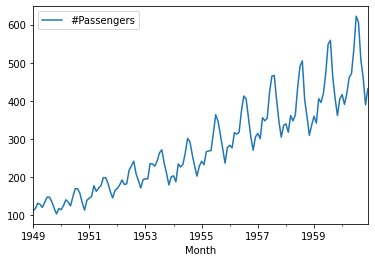

In [3]:
df.plot()

In [4]:
df.columns

Index(['#Passengers'], dtype='object')

In [5]:
# 学習と評価データに分割
df_train = df[df.index < '1957-04-01']
df_test = df[df.index >= '1957-04-01']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 4.537912
         Iterations: 8
         Function evaluations: 21
         Gradient evaluations: 21


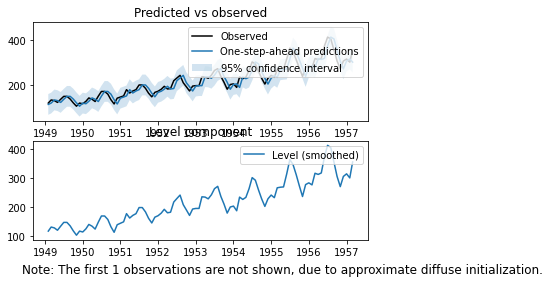

In [6]:


# local level model
local_level_model = sm.tsa.UnobservedComponents(df_train, 'llevel')
# parameter estimation with maximum likelihood estimation
local_level_params = local_level_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = local_level_params.plot_components()

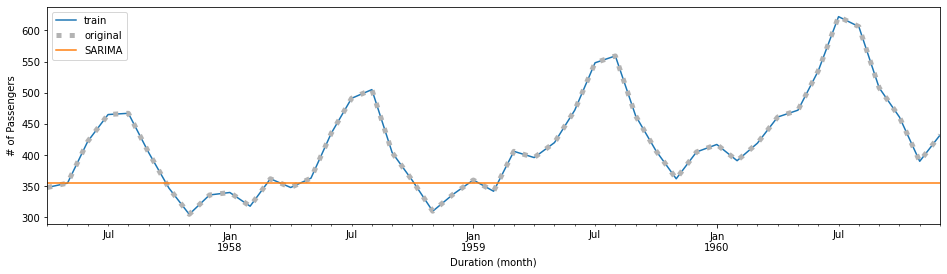

In [7]:
st = pd.to_datetime(df_test.index[0])
ed = pd.to_datetime(df_test.index[-1])
# forecast future values
local_level_pred = local_level_params.predict(st, ed)
# plot results
ax1 = df_test.plot(figsize=(16,4))
df_test.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
#sarima_pred.plot(ax=ax1)
local_level_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 3.400938
         Iterations: 66
         Function evaluations: 111
         Gradient evaluations: 111


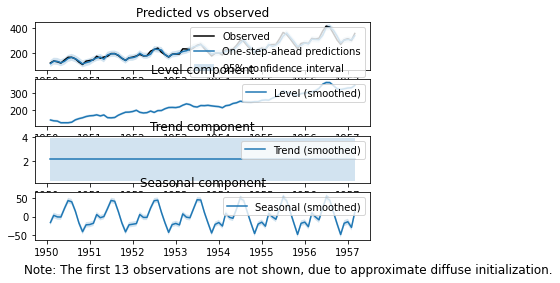

In [8]:
# local level model with seasonality
seasonal_model = sm.tsa.UnobservedComponents(df_train, 'lltrend', seasonal=12)
# parameter estimation with maximum likelihood estimation
seasonal_params = seasonal_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = seasonal_params.plot_components()

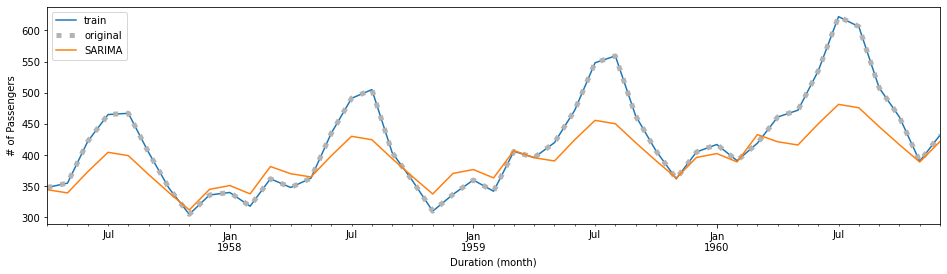

In [9]:
st = pd.to_datetime(df_test.index[0])
ed = pd.to_datetime(df_test.index[-1])
# forecast future values
statespace_pred = seasonal_params.predict(st, ed)
# plot results
ax1 = df_test.plot(figsize=(16,4))
df_test.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
#sarima_pred.plot(ax=ax1)
statespace_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()

## ローカルレベルモデルで様々なモデル（トレンドや季節性の取り込みや分散の省略等）を試して精度を比較する。

参考：https://logics-of-blue.com/wp-content/uploads/2017/05/python-state-space-models.html



|	|model|	説明
|---|---|---|
|0	|'local level'|ローカルレベルモデル
|1	|'local linear trend'|ローカル線形トレンドモデル
|2	|'local level',seasonal=12|季節変動ありローカルレベルモデル	
|3	|'local linear trend',seasonal=12|	季節変動ありローカル線形トレンドモデル
|4	|'local linear deterministic trend',seasonal=12|季節変動ありローカル線形トレンドモデル(トレンド分散なし)
|5	| 'random walk with drift',seasonal=12|季節変動ありローカル線形トレンドモデル(トレンド分散なし、観測誤差なし

In [10]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

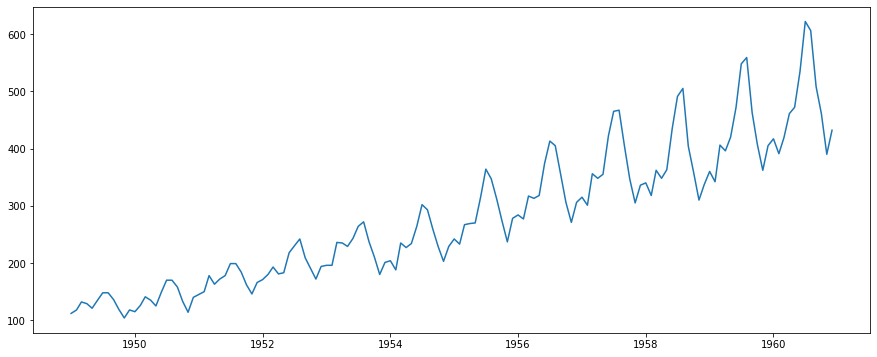

In [13]:
# プロット
plt.plot(df)

ローカルレベルモデルの推定


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Sat, 14 May 2022   AIC                           1415.909
Time:                        02:12:13   BIC                           1421.835
Sample:                    01-01-1949   HQIC                          1418.317
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.312e-07     85.482   1.54e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
Ljung-Box (Q):              

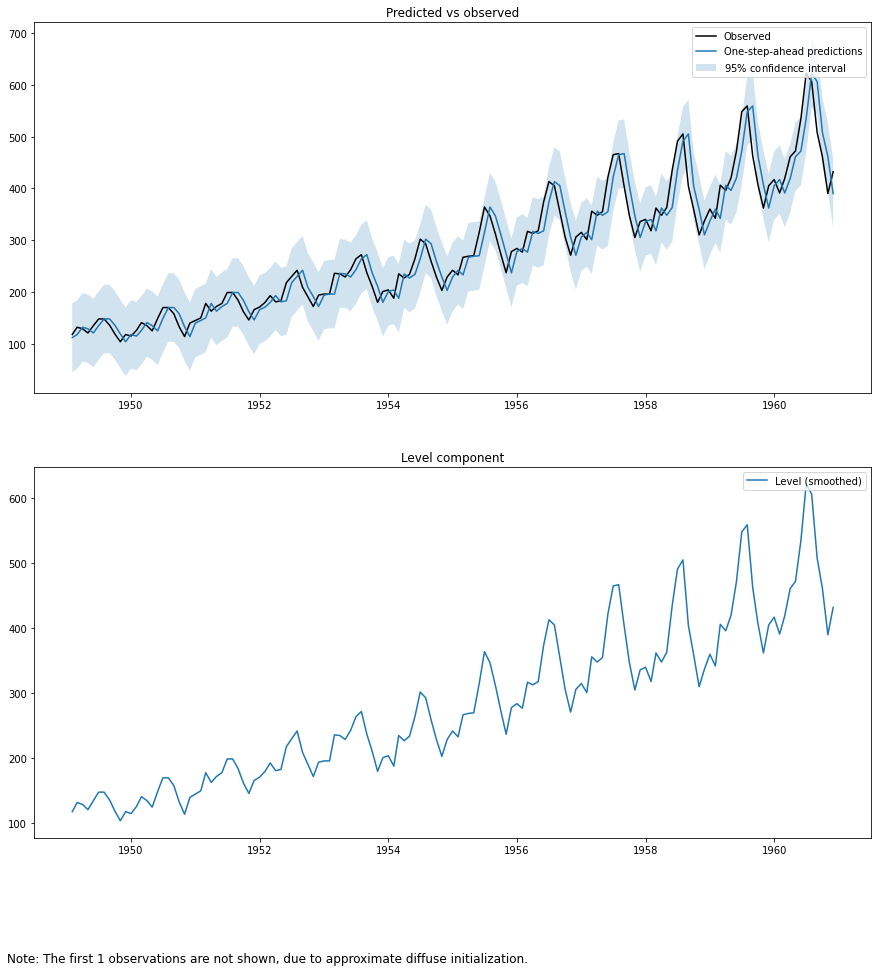

In [14]:
# ローカルレベルモデルの推定
mod_local_level = sm.tsa.UnobservedComponents(df, 'local level')

# 最尤法によるパラメタの推定
res_local_level = mod_local_level.fit()

# 推定されたパラメタ一覧
print(res_local_level.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 15
fig = res_local_level.plot_components()

ローカル線形トレンドモデルの推定

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 5.015259
         Iterations: 19
         Function evaluations: 30
         Gradient evaluations: 30
                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:             local linear trend   Log Likelihood                -722.197
Date:                Sat, 14 May 2022   AIC                           1450.394
Time:                        02:12:14   BIC                           1459.262
Sample:                    01-01-1949   HQIC                          1453.998
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    86.590

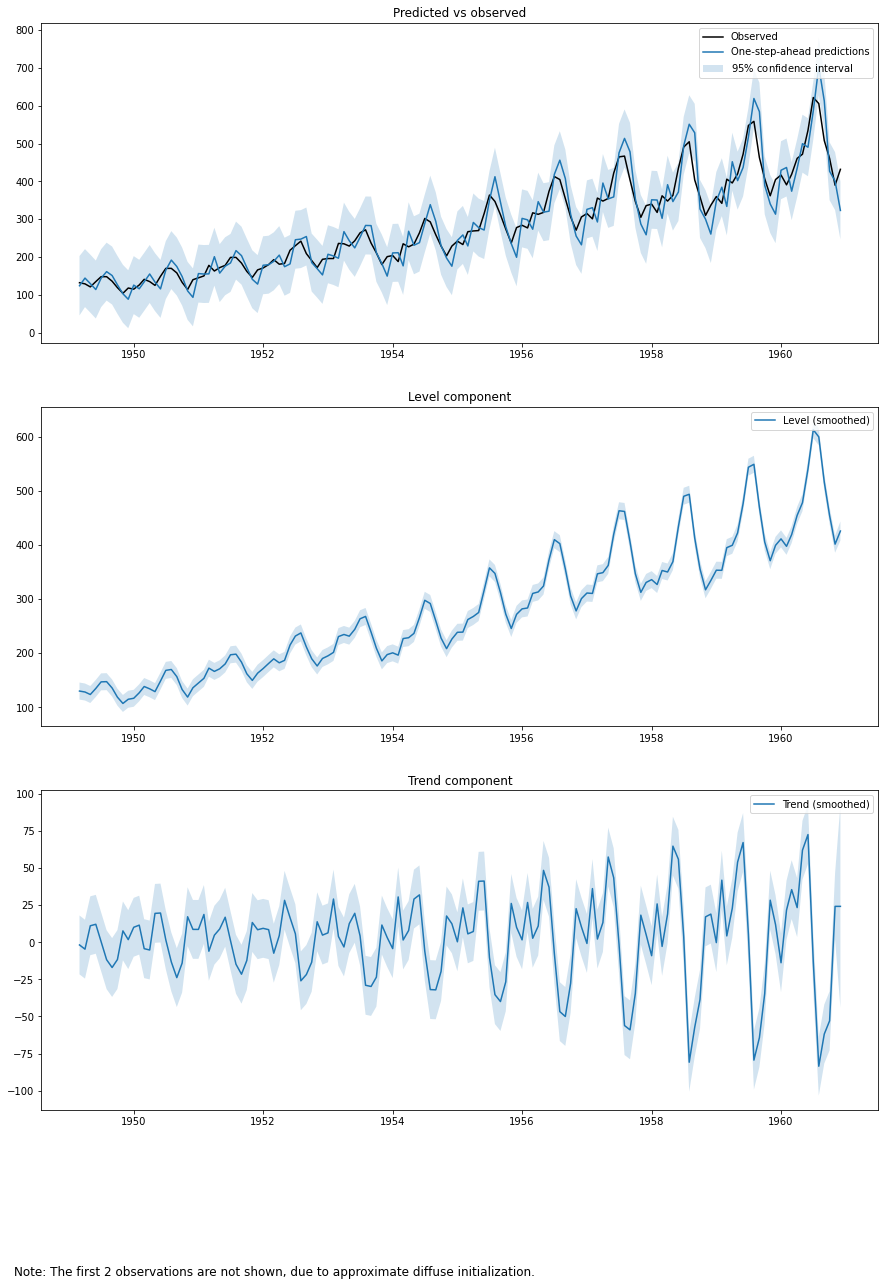

In [15]:
# ローカル線形トレンドモデル

mod_trend = sm.tsa.UnobservedComponents(
    df,
    'local linear trend'
)

# 最尤法によるパラメタの推定
# ワーニングが出たのでBFGS法で最適化する
res_trend = mod_trend.fit(method='bfgs')

# 推定されたパラメタ一覧
print(res_trend.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 20
fig = res_trend.plot_components()

季節変動の取り込み


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 3.969241
         Iterations: 148
         Function evaluations: 266
Optimization terminated successfully.
         Current function value: 3.969241
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                           local level   Log Likelihood                -571.571
                   + stochastic seasonal(12)   AIC                           1149.142
Date:                       Sat, 14 May 2022   BIC                           1157.790
Time:                               02:12:32   HQIC                          1152.656
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cov

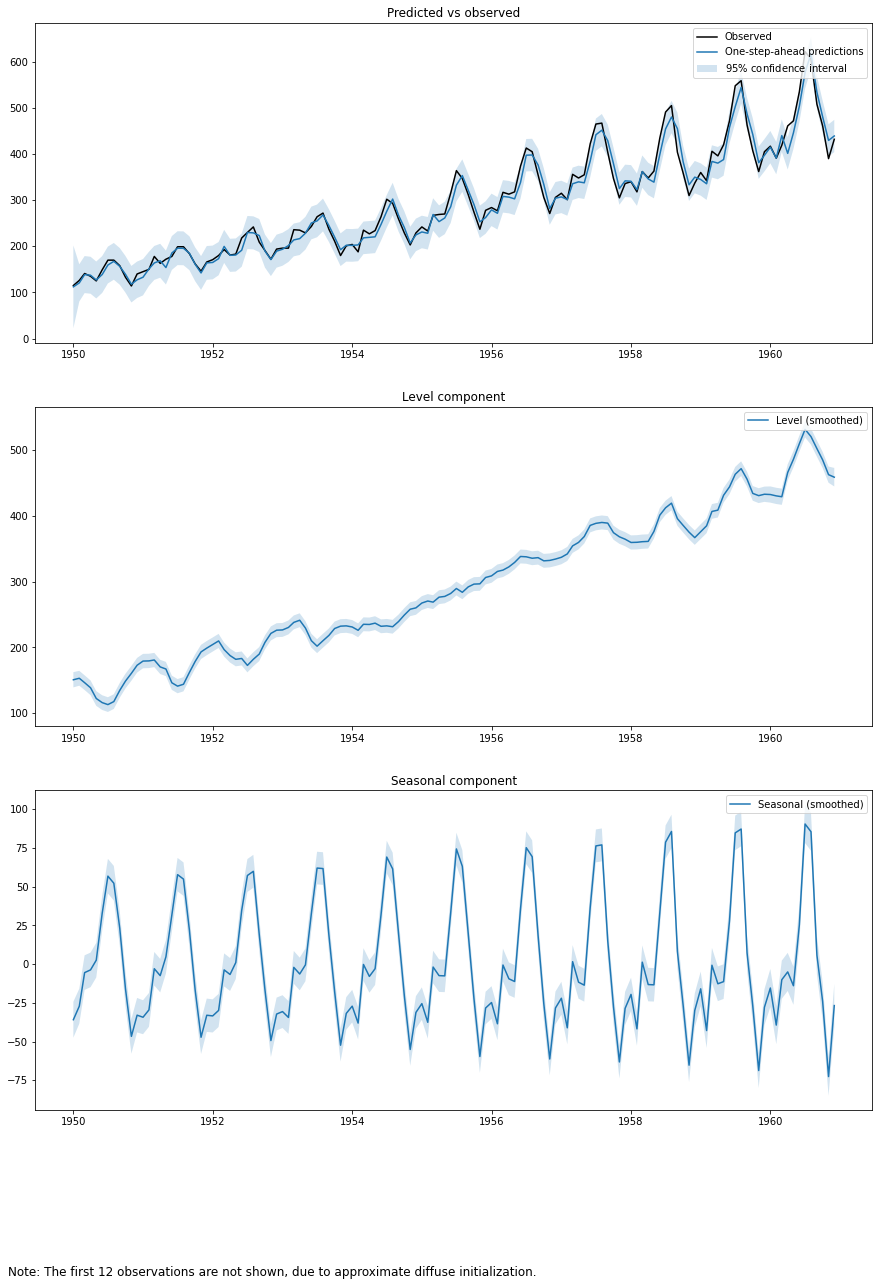

In [17]:
# 季節変動ありのローカルレベルモデル

mod_season_local_level = sm.tsa.UnobservedComponents(
    df,
    'local level',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_local_level = mod_season_local_level.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_local_level.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_local_level.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_local_level.plot_components()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 495
         Function evaluations: 827
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                    local linear trend   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1140.103
Date:                       Sat, 14 May 2022   BIC                           1151.603
Time:                               02:12:36   HQIC                          1144.776
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cov

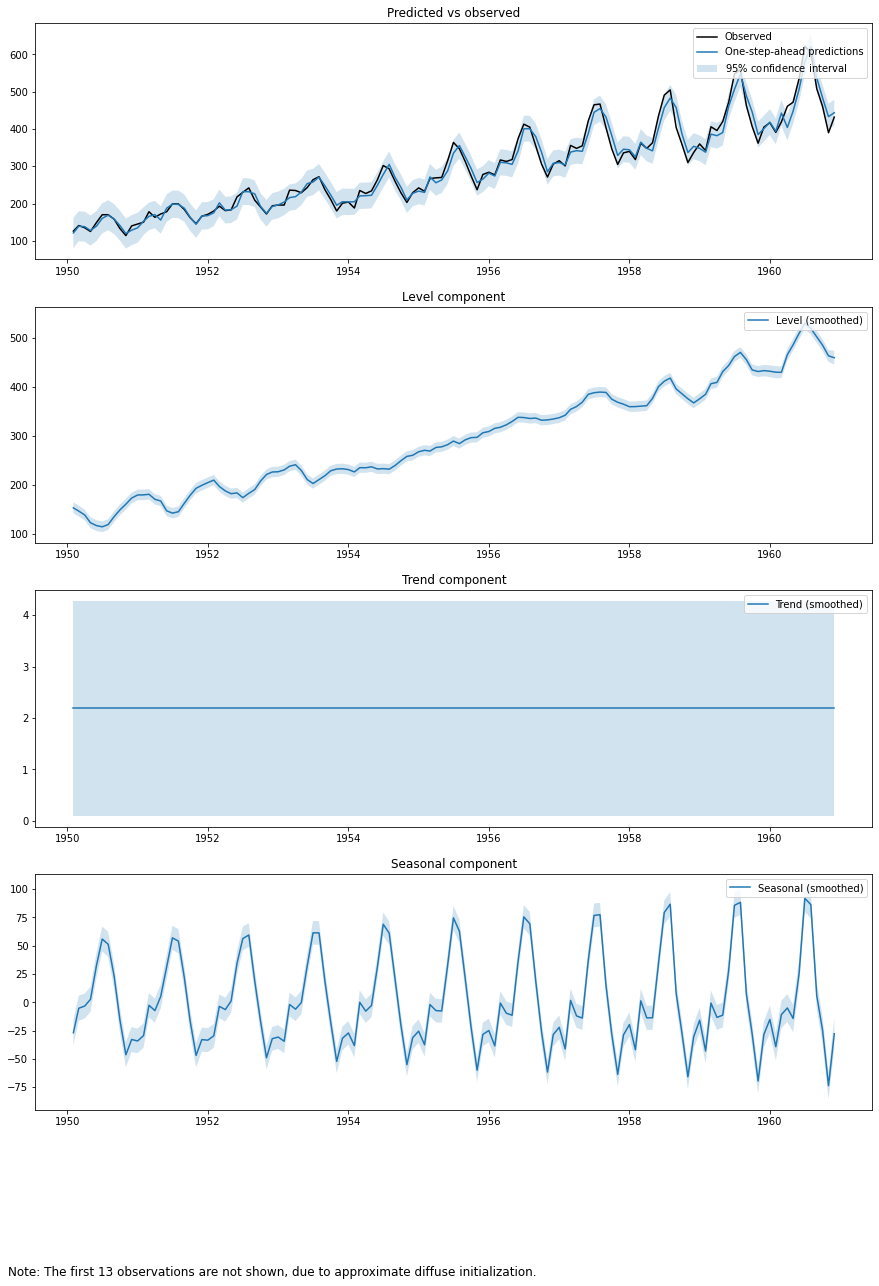

In [18]:
# 季節変動ありのローカル線形トレンドモデル

mod_season_trend = sm.tsa.UnobservedComponents(
    df,
    'local linear trend',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_trend = mod_season_trend.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_trend.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_trend.plot_components()

推定するパラメタの数を減らす

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 115
         Function evaluations: 209
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                               Unobserved Components Results                                
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             local linear deterministic trend   Log Likelihood                -566.051
                          + stochastic seasonal(12)   AIC                           1138.103
Date:                              Sat, 14 May 2022   BIC                           1146.728
Time:                                      02:12:38   HQIC                          1141.608
Sample:                                  01-01-1949                                         
                                       -

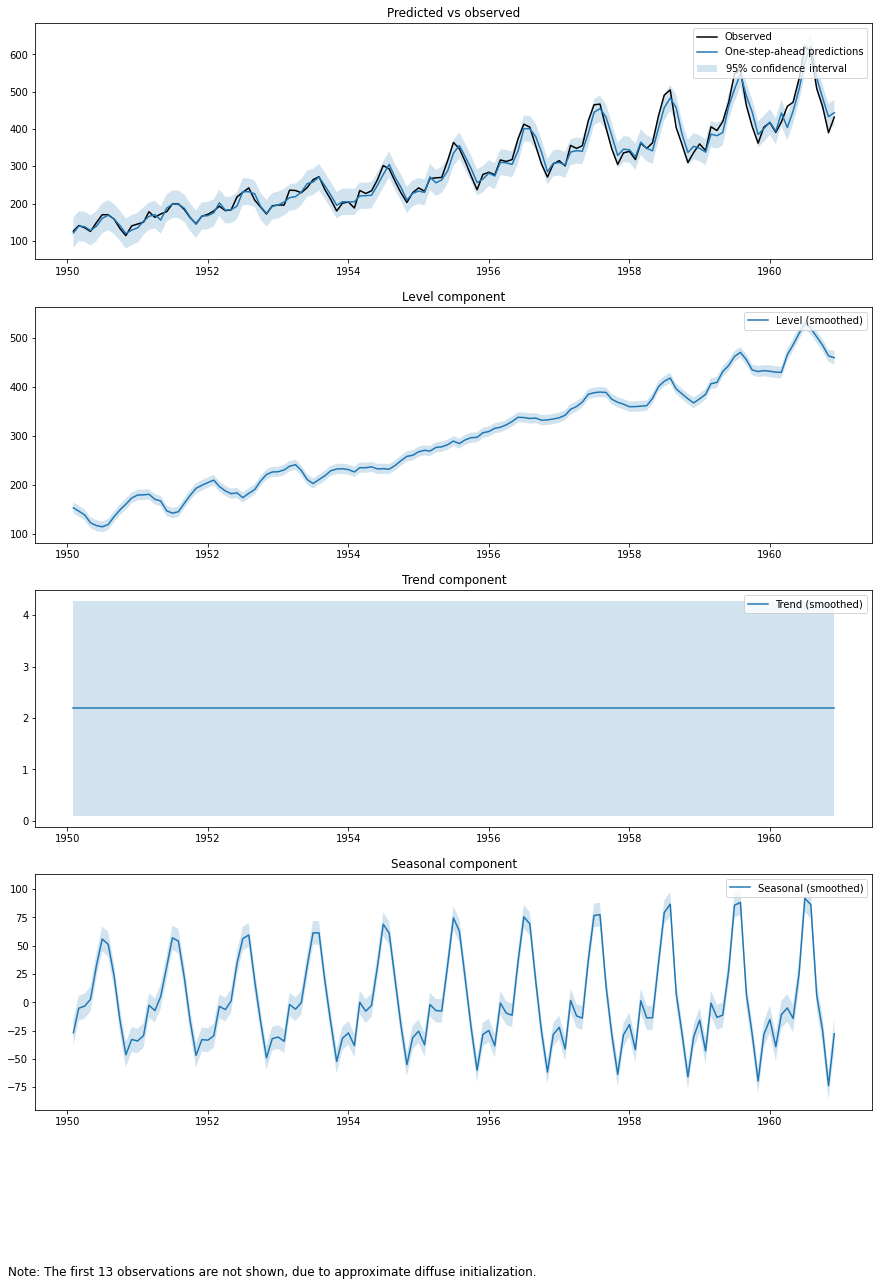

In [19]:
# 詳細は以下の資料を参照してください
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html#statsmodels.tsa.statespace.structural.UnobservedComponents

# 季節変動ありのローカル線形トレンドモデル
# ただし、トレンドの分散は無し

mod_season_trend_d = sm.tsa.UnobservedComponents(
    df,
    'local linear deterministic trend',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_trend_d = mod_season_trend_d.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend_d.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_trend_d.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_trend_d.plot_components()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 66
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                random walk with drift   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1136.103
Date:                       Sat, 14 May 2022   BIC                           1141.853
Time:                               02:12:39   HQIC                          1138.439
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cova

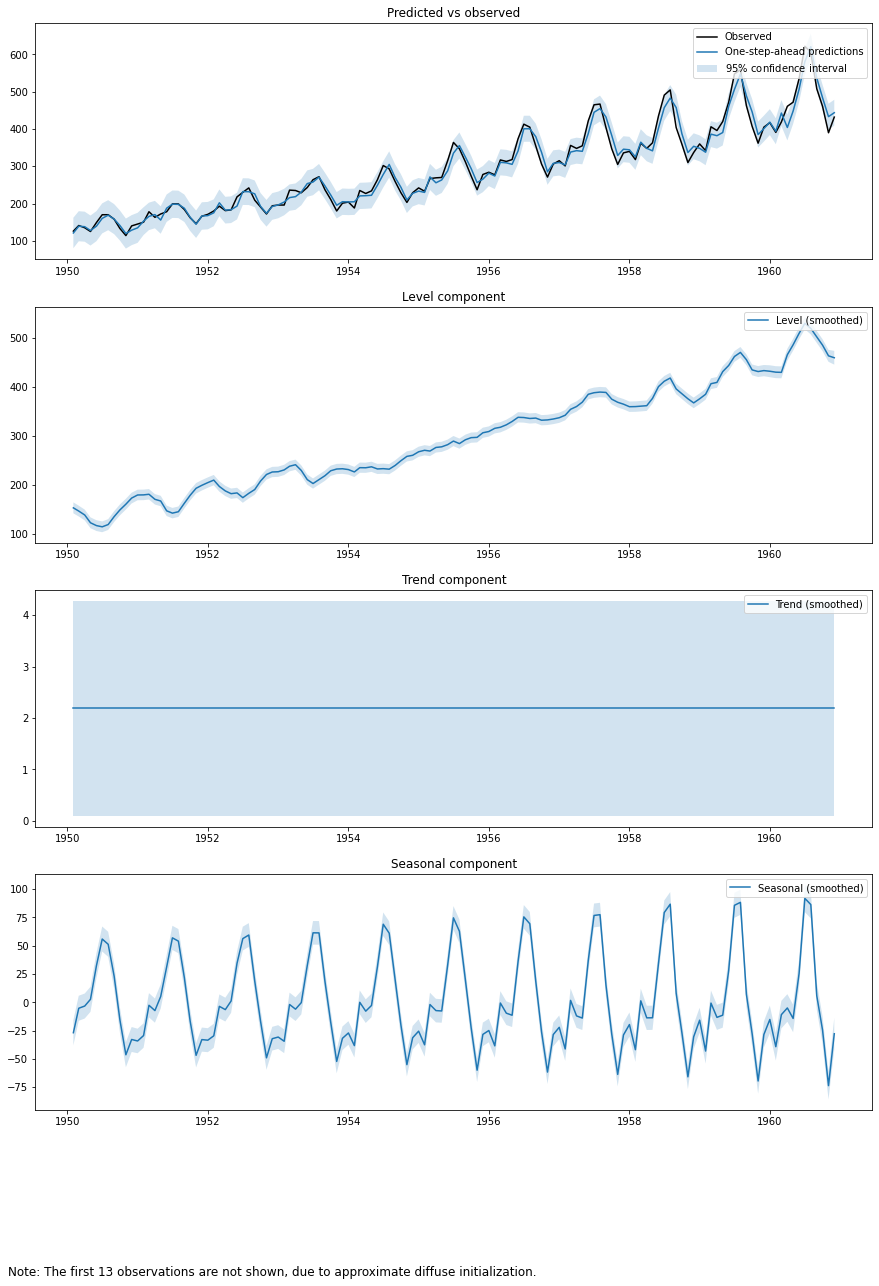

In [20]:
# 詳細は以下の資料を参照してください
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html#statsmodels.tsa.statespace.structural.UnobservedComponents

# 季節変動ありのローカル線形トレンドモデル
# ただし、トレンドの分散は無し

mod_season_rw = sm.tsa.UnobservedComponents(
    df,
    'random walk with drift',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

In [21]:
# 今まで計算してきたモデルのAICを格納する
aic_list = pd.DataFrame(index=range(6), columns=["model", "aic"])

aic_list.iloc[0]["model"] = "res_local_level"
aic_list.iloc[0]["aic"] = res_local_level.aic

aic_list.iloc[1]["model"] = "res_trend"
aic_list.iloc[1]["aic"] = res_trend.aic

aic_list.iloc[2]["model"] = "res_season_local_level"
aic_list.iloc[2]["aic"] = res_season_local_level.aic

aic_list.iloc[3]["model"] = "res_season_trend"
aic_list.iloc[3]["aic"] = res_season_trend.aic

aic_list.iloc[4]["model"] = "res_season_trend_d"
aic_list.iloc[4]["aic"] = res_season_trend_d.aic

aic_list.iloc[5]["model"] = "res_season_rw"
aic_list.iloc[5]["aic"] = res_season_rw.aic


# 結果の表示
aic_list

,model,aic
0,res_local_level,1415.909117
1,res_trend,1450.394469
2,res_season_local_level,1149.141543
3,res_season_trend,1140.102616
4,res_season_trend_d,1138.102616
5,res_season_rw,1136.102616


Text(0.5, 1.0, 'res_season_rw')

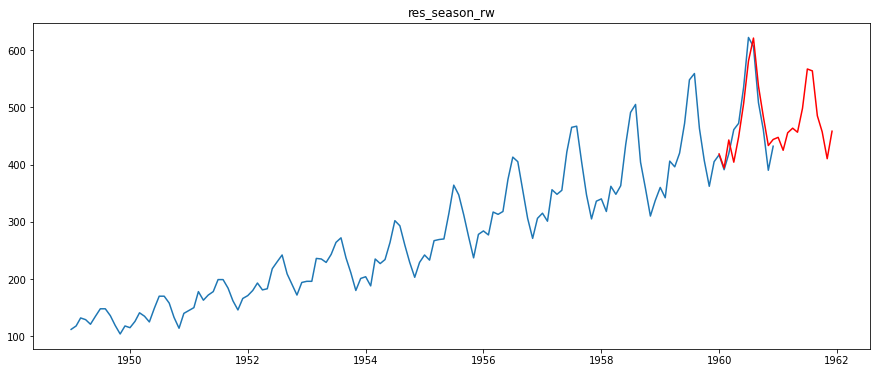

In [22]:
# 予測
pred = res_season_rw.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(df)
plt.plot(pred, "r")
plt.title('res_season_rw')

Text(0.5, 1.0, 'res_local_level')

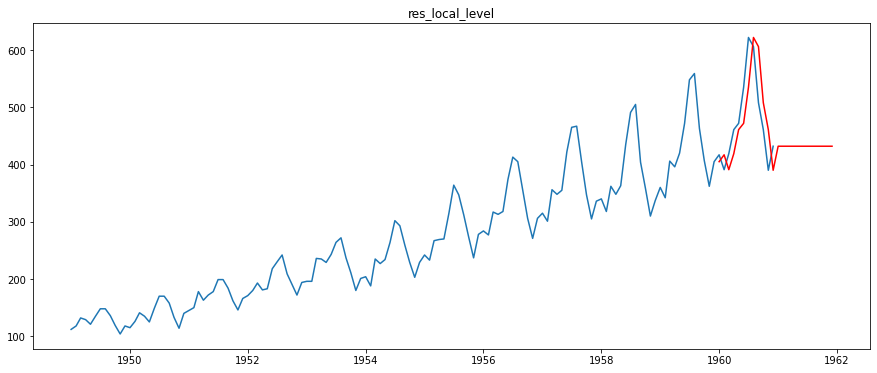

In [23]:
# 予測
pred = res_local_level.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(df)
plt.plot(pred, "r")
plt.title('res_local_level')

Text(0.5, 1.0, 'res_trend')

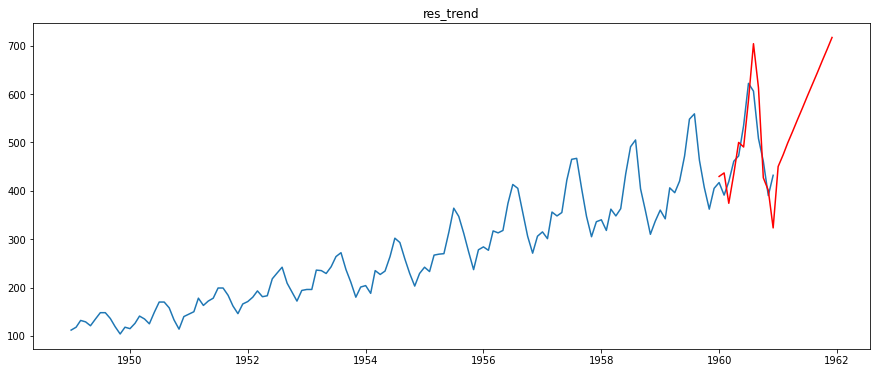

In [24]:
# 予測
pred = res_trend.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(df)
plt.plot(pred, "r")
plt.title('res_trend')

Text(0.5, 1.0, 'res_season_local_level')

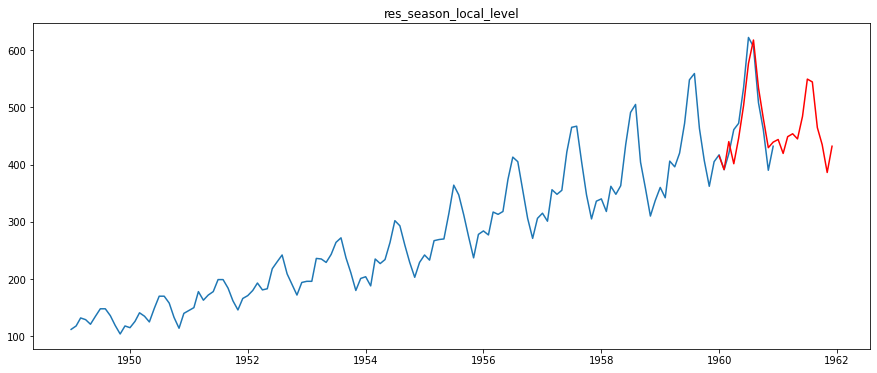

In [25]:
# 予測
pred = res_season_local_level.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(df)
plt.plot(pred, "r")
plt.title('res_season_local_level')

## 線形ガウス型モデルの設計と解析([島田])

- Pycalmanによるトレンドの推定モデル構築

In [28]:
!pip install pykalman

     |████████████████████████████████| 228 kB 15.3 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=2a5b7887b79d03aac0fce38b03a9754c639a88f6c0f474cb6b5e23308bff896e
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [29]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
import statsmodels as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from pykalman import KalmanFilter

In [32]:
# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
df.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


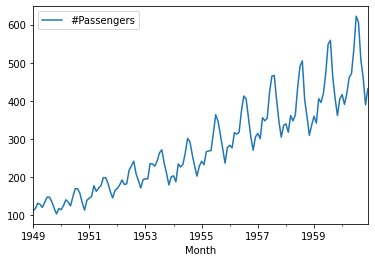

In [33]:
df.plot()

In [34]:
# 推移行列などの初期化
## ここで n_dim_obs=1, n_dim_trend=2とする
def FGHset(n_dim_trend, n_dim_obs=1, n_dim_series=0, Q_sigma2=10):
    n_dim_Q=2
    n_dim_state = n_dim_trend
    
    # 行列の初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
  
    # 各行列のトレンド成分に対するブロック行列を構築
    G[0,0] = 1
    H[0,0] = 1
    
    # トレンドモデルの推移行列の構築
    # 非定常過程でも対応できる推移行列を構築 
    F[0,0] = 2
    F[0,1] = -1
    F[1,0] = 1
        
    # PyKalmanのQはG.dot(Q).dot(G.T)を想定しているためQをupdate
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q

In [35]:
# 観測値の次元数
n_dim_obs = 1
# トレンドの次元数
n_dim_trend = 2

# 推移行列などの定義
n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs)

In [36]:
 n_dim_state, F, H, Q

(2, array([[ 2., -1.],
        [ 1.,  0.]]), array([[1., 0.]]), array([[10.,  0.],
        [ 0.,  0.]]))

In [37]:
# 状態の平均値ベクトルの初期値
initial_state_mean = np.zeros(n_dim_state)
# 状態の分散共分散行列の初期値
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

# カルマンフィルタのモデル生成
kf = KalmanFilter(
    # l：観測値の次元数
    n_dim_obs=n_dim_obs,
    # k：状態の次元数
    n_dim_state=n_dim_state,
    # x_0：状態の平均値ベクトルの初期値（k次元）
    initial_state_mean=initial_state_mean,
    # V_0：状態の分散共分散行列の初期値（k×k次元）
    initial_state_covariance=initial_state_covariance,
    # F：推移行列（k×k次元）
    transition_matrices=F,
    # H：観測行列（l×k次元）
    observation_matrices=H,
    # R：観測ノイズwの分散共分散行列（l×l次元。観測値が一次元の場合はスカラ）
    observation_covariance=1.0,
    # Q：システムノイズvの分散共分散行列（m×m次元）
    transition_covariance=Q)

In [38]:
# 前半120時点を学習データに121時点以降のデータを検証用に使用
n_train = 120
train, test = df.values[:n_train], df.values[n_train:]

In [39]:
smoothed_state_means, smoothed_state_covs = kf.smooth(train)
pred_o_smoothed = smoothed_state_means.dot(H.T)

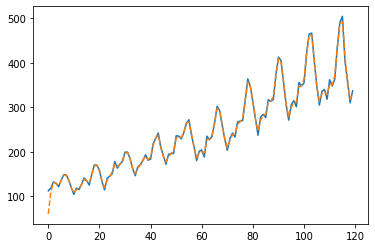

In [40]:
plt.plot(train, label="observation")
plt.plot(pred_o_smoothed, '--', label="predict")

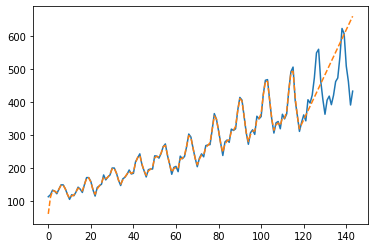

In [41]:
plt.plot(df.values, label="observation")

# 長期予測格納用のベクトルを用意（値は全て入れ替わるため0で初期化しなくてよい）
pred_y = np.empty(len(test))

# 現在の状態と分散共分散行列を取得
current_state = smoothed_state_means[-1]
current_cov = smoothed_state_covs[-1]
for i in range(len(test)):
    # filter_updateは観測値を入力しなければ1期先予測のみを実行する
    current_state, current_cov = kf.filter_update(current_state, 
                                                  current_cov, 
                                                  observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)
    
# np.hstackはnp.concatenateでもよい
plt.plot(np.hstack([pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

### Kalman by seasonal

In [42]:
# 推移行列などの初期化
def FGHset(n_dim_trend, n_dim_obs=1, n_dim_series=0, Q_sigma2=10):
    n_dim_Q = (n_dim_trend!=0) + (n_dim_series!=0)
    if n_dim_series>0:
        n_dim_state = n_dim_trend + n_dim_series - 1
    else:
        n_dim_state = n_dim_trend
    
    # 行列の初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
    
    ## トレンドモデルのブロック行列の構築
    G[0,0] = 1
    H[0,0] = 1
    if n_dim_trend==1: 
        F[0,0] = 1
    elif n_dim_trend==2:
        F[0,0] = 2
        F[0,1] = -1
        F[1,0] = 1
    elif n_dim_trend==3:
        F[0,0] = 3
        F[0,1] = -3
        F[0,2] = 1
        F[1,0] = 1
        F[2,1] = 1
        
    start_elem = n_dim_trend
    start_col = n_dim_trend
    # 季節調整成分のブロック行列の構築
    if n_dim_series>0:
        G[start_elem, 1] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_series-1): 
            F[start_elem, start_elem+i] = -1
        for i in range(n_dim_series-2): 
            F[start_elem+i+1, start_elem+i] = 1
    
    # PyKalmanのQはG.dot(Q).dot(G.T)を想定しているためQをupdate
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q

In [43]:
# 観測値の次元数
n_dim_obs = 1
# トレンドの次元数
n_dim_trend = 2
# 季節成分の次元数
n_dim_series = 12

# 推移行列などの定義
n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs, n_dim_series)

In [44]:
# 状態の平均値ベクトルの初期値
initial_state_mean = np.zeros(n_dim_state)
# 状態の分散共分散行列の初期値
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

# カルマンフィルタのモデル生成
kf = KalmanFilter(
    # l：観測値の次元数
    n_dim_obs=n_dim_obs,
    # k：状態の次元数
    n_dim_state=n_dim_state,
    # x_0：状態の平均値ベクトルの初期値（k次元）
    initial_state_mean=initial_state_mean,
    # V_0：状態の分散共分散行列の初期値（k×k次元）
    initial_state_covariance=initial_state_covariance,
    # F：推移行列（k×k次元）
    transition_matrices=F,
    # H：観測行列（l×k次元）
    observation_matrices=H,
    # R：観測ノイズwの分散共分散行列（l×l次元。観測値が一次元の場合はスカラ）
    observation_covariance=1.0,
    # Q：システムノイズvの分散共分散行列（m×m次元）
    transition_covariance=Q)

In [45]:
# 前半120時点を学習データに121時点以降のデータを検証用に使用
n_train = 120
train, test = df.values[:n_train], df.values[n_train:]

In [46]:
# フィルタ＋平滑化
smoothed_state_means, smoothed_state_covs = kf.smooth(train)
pred_o_smoothed = smoothed_state_means.dot(H.T)

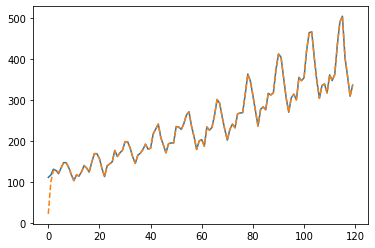

In [47]:
plt.plot(train, label="observation")
plt.plot(pred_o_smoothed, '--', label="predict")

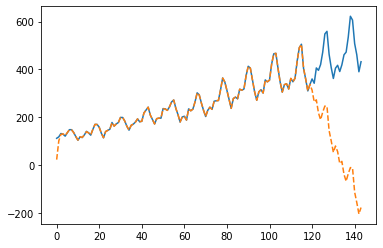

In [48]:
plt.plot(df.values, label="observation")

pred_y = np.empty(len(test))
current_state = smoothed_state_means[-1]
current_cov = smoothed_state_covs[-1]
for i in range(len(test)):
    current_state, current_cov = kf.filter_update(current_state, 
                                                  current_cov, 
                                                  observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)
    
plt.plot(np.hstack([pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

## EMアルゴリズムを用いたハイパーパラメタ最適化

In [49]:
# 繰り返し回数は10回
# ハイパーパラメタ更新の対象はF, H, Q, R
emed_kf = kf.em(train, n_iter=10, em_vars='all')

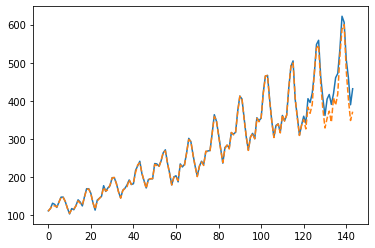

In [50]:
# ハイパーパラメタF, H, Q, R更新後の平滑化系列
em_smoothed_state_means, em_smoothed_state_covs = emed_kf.smooth(train)
em_pred_o_smoothed = np.dot(em_smoothed_state_means, emed_kf.observation_matrices.T)
plt.plot(df.values, label="observation")

current_state = em_smoothed_state_means[-1]
current_cov = em_smoothed_state_covs[-1]

pred_y = np.empty(len(test))
for i in range(len(test)):
    current_state, current_cov = emed_kf.filter_update(current_state, current_cov, observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)

plt.plot(np.hstack([em_pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

In [51]:
emed_kf.transition_matrices

array([[ 1.08963171e+00, -8.72665712e-02,  5.13701752e-01,
         2.90413551e-01,  2.64858509e-01,  3.02954702e-01,
         3.96605384e-01,  4.73886236e-01,  3.79273059e-01,
         3.44001343e-01,  2.80837854e-01,  2.53059290e-01,
         3.03240754e-01],
       [ 9.99999862e-01,  1.38654933e-07, -1.03146568e-07,
         2.82762968e-08, -1.21820519e-07,  2.15050544e-08,
        -1.09204135e-07,  3.00108252e-08, -1.01670171e-07,
         3.32350130e-08, -1.09035828e-07,  2.18953364e-08,
        -1.27746060e-07],
       [-2.35396621e-01,  2.35410843e-01,  6.94840696e-01,
        -9.61096576e-01,  7.76888827e-01, -1.05060684e+00,
         8.19377089e-01, -1.08374044e+00,  9.02593248e-01,
        -1.11055202e+00,  8.44006095e-01, -1.10396025e+00,
         8.24978661e-01],
       [ 3.37276433e-09, -3.19745781e-09,  9.99999986e-01,
        -1.86765119e-08,  1.03158627e-09, -1.52991232e-08,
        -9.03565521e-09, -1.12046427e-08, -1.08498094e-08,
        -5.81690933e-09, -1.37935893e

### seasonal + AR

In [52]:
# 推移行列などの初期化
def FGHset(n_dim_trend, 
           n_dim_obs=1, n_dim_series=0, n_dim_ar=0, Q_sigma2=10):
    n_dim_Q = (n_dim_trend!=0) + (n_dim_series!=0) + (n_dim_ar!=0)
    if n_dim_series>0 or n_dim_ar>0:
        n_dim_state = n_dim_trend + n_dim_series + n_dim_ar - 1
    else:
        n_dim_state = n_dim_trend
    
    # 行列の初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
    
    ## トレンドモデルのブロック行列の構築
    G[0,0] = 1
    H[0,0] = 1
    if n_dim_trend==1: 
        F[0,0] = 1
    elif n_dim_trend==2:
        F[0,0] = 2
        F[0,1] = -1
        F[1,0] = 1
    elif n_dim_trend==3:
        F[0,0] = 3
        F[0,1] = -3
        F[0,2] = 1
        F[1,0] = 1
        F[2,1] = 1
        
    start_elem = n_dim_trend
    start_col = n_dim_trend
    # 季節調整成分のブロック行列の構築
    if n_dim_series>0:
        G[start_elem, 1] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_series-1): 
            F[start_elem, start_elem+i] = -1
        for i in range(n_dim_series-2): 
            F[start_elem+i+1, start_elem+i] = 1

        start_elem = n_dim_trend + n_dim_series - 1
        start_col = n_dim_trend + n_dim_series - 1
            
    # AR成分のブロック行列の構築
    if n_dim_ar>0:
        G[start_elem, 2] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_ar): 
            F[start_elem, start_elem+i] = 0
        for i in range(n_dim_ar-1): 
            F[start_elem+i+1, start_elem+i] = 1

            
    # PyKalmanのQはG.dot(Q).dot(G.T)を想定しているためQをupdate
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q

In [53]:
# 観測値の次元数
n_dim_obs = 1
# トレンドの次元数
n_dim_trend = 2
# 季節成分の次元数
n_dim_series = 12
# AR成分の次元数
n_dim_ar = 2

# 推移行列などの定義
n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs, n_dim_series, n_dim_ar)

In [54]:
# 状態の平均値ベクトルの初期値
initial_state_mean = np.zeros(n_dim_state)
# 状態の分散共分散行列の初期値
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

# カルマンフィルタのモデル生成
kf = KalmanFilter(
    # l：観測値の次元数
    n_dim_obs=n_dim_obs,
    # k：状態の次元数
    n_dim_state=n_dim_state,
    # x_0：状態の平均値ベクトルの初期値（k次元）
    initial_state_mean=initial_state_mean,
    # V_0：状態の分散共分散行列の初期値（k×k次元）
    initial_state_covariance=initial_state_covariance,
    # F：推移行列（k×k次元）
    transition_matrices=F,
    # H：観測行列（l×k次元）
    observation_matrices=H,
    # R：観測ノイズwの分散共分散行列（l×l次元。観測値が一次元の場合はスカラ）
    observation_covariance=1.0,
    # Q：システムノイズvの分散共分散行列（m×m次元）
    transition_covariance=Q)

In [55]:
# フィルタ＋平滑化
smoothed_state_means, smoothed_state_covs = kf.smooth(train)
pred_o_smoothed = smoothed_state_means.dot(H.T)

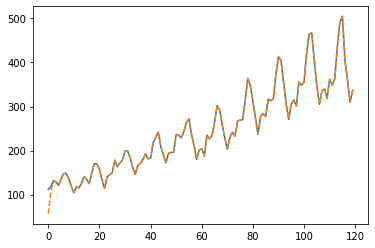

In [56]:
plt.plot(train, label="observation")
plt.plot(pred_o_smoothed, '--', label="predict")

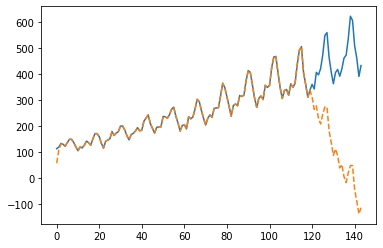

In [57]:
plt.plot(df.values, label="observation")

pred_y = np.empty(len(test))
current_state = smoothed_state_means[-1]
current_cov = smoothed_state_covs[-1]
for i in range(len(test)):
    current_state, current_cov = kf.filter_update(current_state, 
                                                  current_cov, 
                                                  observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)
    
plt.plot(np.hstack([pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")